## Q.2
#### Solve the following matrix using simultaneous equations in python

6x+2y−5z=13
3x+3y−2z=13
7x+5y−3z=26

In [1]:
# Making imports
import numpy as np

In [2]:
#Initialize Matrices to array
A = np.array([[6,2,-5],[3,3,-2],[7,5,-3]])
B = np.array([[13],[13],[26]])

In [3]:
#Compute matrix inverse
Ainv = np.linalg.inv(A) 
print(A) 
print(B)
print(Ainv)

[[ 6  2 -5]
 [ 3  3 -2]
 [ 7  5 -3]]
[[13]
 [13]
 [26]]
[[ 0.03846154 -0.73076923  0.42307692]
 [-0.19230769  0.65384615 -0.11538462]
 [-0.23076923 -0.61538462  0.46153846]]


In [4]:
#Resolve for x,y,z by computing dot product of matrices Ainv and B(Ainv.B)
X = np.dot(Ainv,B)
print(X)
#Results -x = X[0], y=X[1], z= X[2]

[[2.]
 [3.]
 [1.]]


## Q.3
#### The following dataset of size n = 63 provides total payment (in thousands)for all the claims of Swedish Kronor for geographical zones in Sweden. The variables are y = total payment in thousands and x = number of claims. Find the intercept, coefficient value and error term for this regression problem. How would you convey these numbers in a business context?

In [5]:
#Making imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
# Read the dataset
dataset = pd.read_csv('slr06-1.csv')

In [7]:
dataset.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [8]:
x= dataset['X'].values.reshape(-1,1)
y= dataset['Y'].values.reshape(-1,1)
# View the size of the arrays X and Y
print(x.shape)
print(y.shape)

(63, 1)
(63, 1)


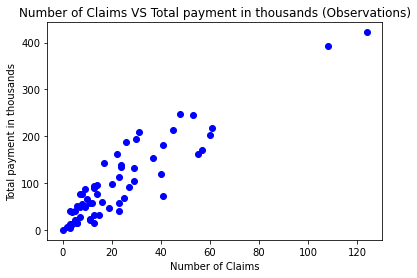

In [9]:
# Visualize the dataset
plt.scatter(x, y, color='blue')
plt.title('Number of Claims VS Total payment in thousands (Observations)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment in thousands')
plt.show()

In [10]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=1/3, random_state=0)
# There are 63 observations or rows in the dataset. 
# This dataset is split into two - training data and testing data.
# The ratio of split is given by the parameter test_size. 
# In this example test_size=1/3 says that 42 observations are used for training
# and rest 21 observations are used for testing.


In [11]:
from sklearn.linear_model import LinearRegression
# Create the model
model = LinearRegression()

# Train the model, using training data set
model.fit(X_train, Y_train)


LinearRegression()

## The coefficient and Intercept 

In [12]:
# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model.intercept_)

Coefficient = Theta1 =  [[3.38384102]]
Intercept = Theta0 =  [20.17489543]


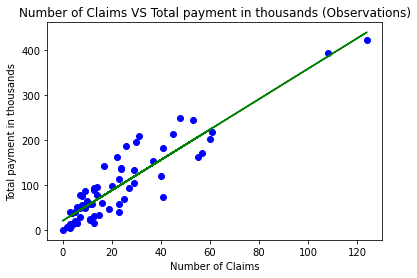

In [13]:
# Visualize the fitted regression line

plt.scatter(x, y, color='blue')
plt.plot(X_train, model.predict(X_train), color='green')
plt.title('Number of Claims VS Total payment in thousands (Observations)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment in thousands')
plt.show()

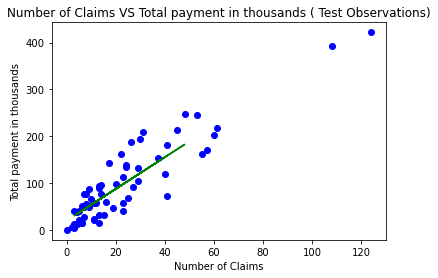

In [84]:
# Use trained model to predict on test dataset
Y_predict = model.predict(X_test)
plt.scatter(x, y, color='blue')
plt.plot(X_test, model.predict(X_test), color='green')
plt.title('Number of Claims VS Total payment in thousands ( Test Observations)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment in thousands')
plt.show()

# Error Term - Mean squared Error

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
#Mean squared error regression loss
mse = mean_squared_error(Y_test, Y_predict)
print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict))
print("RMSE = %.2f" % math.sqrt(mse))
num_data = x.shape[0]
rse = mse*num_data
rse /= num_data-2
rse = math.sqrt(rse)
print("RSE =",rse)
# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

print('Variance R2 score = %.2f' % r2_score(Y_test, Y_predict))

Mean squared error = 1476.80
RMSE = 38.43
RSE = 39.054055343851296
Variance R2 score = 0.63


# Summary of findings
We know, y = w0+w1x.
From results w0= 20.17489543 and w1 = 3.38384102.
Total payment = 20.17489543 + 3.38384102 (Number of Claims).
Mean squared Error = 1476.80,
Root Mean squared Error is 38.43,
variance/R2 score of 1 is used to convey perfect prediction. From the results our Linear regression best fit model's variance score is 0.63 which is neither too good(close to 1) nor too bad(close to 0) to predict the total payment for a given claim.
Residual standard error is 39.054055343851296 which represents the average variation around best fitted regression line.
Suggestive to collect more data to predict more accurate model, atleast 100 rows of data set required against current 63.
Also suggestive to get domain expert advice on determing other independent feature variables like age, gender, etc with its data. If we can get geographic zone information, we could try grouping data set based on zones and observe co-relation and could help find better fitting model.
